# Explore the titanic data

Import all the necessary libraries

In [74]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

Load the data. This is what the data looks like.

In [75]:
train_df = pd.read_csv('train.csv', header = 0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check the general info of the data
Note that we need to:
```
1. Fill out missing data (e.g., "Age", "Cabin", and "Embarked") 
2. Decide which features we are going to use
3. onvert useful objects to numerical values
```

In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Explore "Pclass"

Higher class has a lower survival rate.

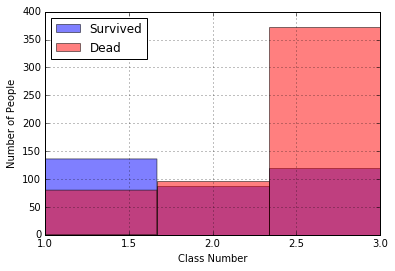

In [77]:
survive_class = train_df.Pclass[train_df['Survived'] == 1]
dead_class = train_df.Pclass[train_df['Survived'] == 0]
plt.hist(survive_class, bins = 3, alpha = 0.5, color = 'b', label = 'Survived')
plt.hist(dead_class, bins = 3,  alpha = 0.5, color = 'r', label = 'Dead')
plt.legend(loc = 'upper left')
plt.xlabel('Class Number')
plt.ylabel('Number of People')
plt.grid(True)

## Explore "Sex"

Way more females survived than males

In [78]:
total_male = len(train_df[train_df['Sex'] == 'male'])
total_female = len(train_df[train_df['Sex'] == 'female'])
survived_male = len(train_df[ (train_df['Sex'] == 'male') & (train_df['Survived'] == 1) ])
survived_female = len(train_df[ (train_df['Sex'] == 'female') & (train_df['Survived'] == 1) ])

print (str(survived_male/float(total_male) * 100) + '% of ' + str(total_male) + ' males survived')
print (str(survived_female/float(total_female) * 100) + '% of ' + str(total_female) + ' females survived')
print (str((survived_male + survived_female)/float(total_male + total_female) * 100) +
       '% of ' + str(total_male + total_female) + ' people survived')

18.8908145581% of 577 males survived
74.2038216561% of 314 females survived
38.3838383838% of 891 people survived


## Explore "Age"

Age does not impact survival that much except the babies tend to survive more.

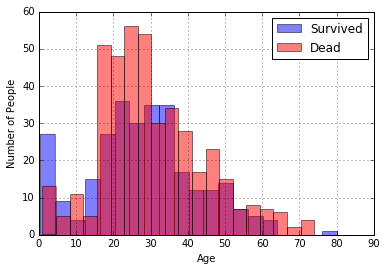

In [79]:
survived_age = train_df.Age[(train_df['Survived'] == 1) &
                            (~pd.isnull(train_df['Age']))]
dead_age = train_df.Age[(train_df['Survived'] == 0) &
                            (~pd.isnull(train_df['Age']))]
plt.hist(survived_age, bins = 20, alpha = 0.5, color = 'b', label = 'Survived')
plt.hist(dead_age, bins = 20, alpha = 0.5, color = 'r', label = 'Dead')
plt.legend(loc = 'upper right')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(True)

## Explore "Fare"

People with higher ticket fare have a higher survival rate.

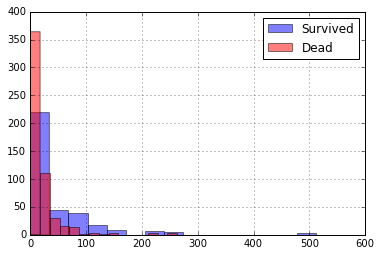

In [80]:
survived_fare = train_df.Fare[train_df['Survived'] == 1]
dead_fare = train_df.Fare[train_df['Survived'] == 0]
plt.hist(survived_fare, bins = 15, alpha = 0.5, color = 'b', label = 'Survived')
plt.hist(dead_fare, bins = 15, alpha = 0.5, color = 'r', label = 'Dead')
plt.legend(loc = 'upper right')
plt.grid(True)

## Explore "SibSp" (siblings)

I don't see any relevance.

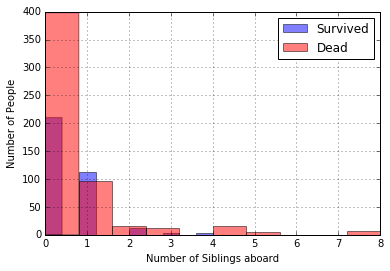

In [81]:
survive_sibsp = train_df.SibSp[train_df['Survived'] == 1]
dead_sibsp = train_df.SibSp[train_df['Survived'] == 0]
plt.hist(survive_sibsp, alpha = 0.5, color = 'b', label = 'Survived')
plt.hist(dead_sibsp, alpha = 0.5, color = 'r', label = 'Dead')
plt.legend(loc = 'upper right')
plt.xlabel('Number of Siblings aboard')
plt.ylabel('Number of People')
plt.grid(True)

## Explore "Parch" (parents/children)

I don't see any relevance.

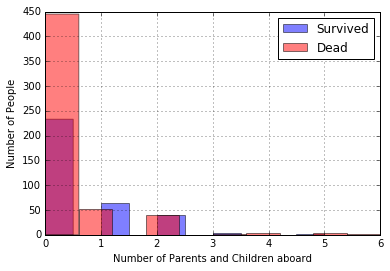

In [82]:
survive_parch = train_df.Parch[train_df['Survived'] == 1]
dead_parchp = train_df.Parch[train_df['Survived'] == 0]
plt.hist(survive_parch, alpha = 0.5, color = 'b', label = 'Survived')
plt.hist(dead_parchp, alpha = 0.5, color = 'r', label = 'Dead')
plt.legend(loc = 'upper right')
plt.xlabel('Number of Parents and Children aboard')
plt.ylabel('Number of People')
plt.grid(True)

## Explore "Embarked"

People embarked from C survived at slightly higher rate.

In [83]:
for i in {'S', 'C', 'Q'}:
    embarked = len(train_df[train_df['Embarked'] == i])
    survive_embarked = len(train_df[ (train_df['Embarked'] == i) &
                                     (train_df['Survived'] == 1) ])
    print('In ' + i + ': ' + str(survive_embarked/float(embarked) * 100) +
          '% of ' + str(embarked) + ' people survived')

In Q: 38.961038961% of 77 people survived
In C: 55.3571428571% of 168 people survived
In S: 33.6956521739% of 644 people survived
